In [5]:
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio
import os
from matplotlib.pyplot import figure
import skimage.io
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from tqdm.notebook import tqdm

In [6]:
rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor'] = 'MistyRose'

# New Readings

In [7]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({
                   'accuracy' :[92.66, 90.47, 92.47, 86.19, 90.85, 68.28],
    
                   'NCS2'  :[0.0372, 0.0668, 0.1227, 0.1828, 0.0539, 0.1429],
                'NCS2_Rasp':[0.0522, 0.0835, 0.1448, 0.2314, 0.0723, 0.1898],
                   'CPU'   :[0.0212, 0.0451, 0.0591, 0.1267, 0.0384, 0.0324],
                   'GPU'   :[0.0193, 0.0311, 0.0549, 0.0516, 0.0307, 0.0211],
                   'model' :['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']})

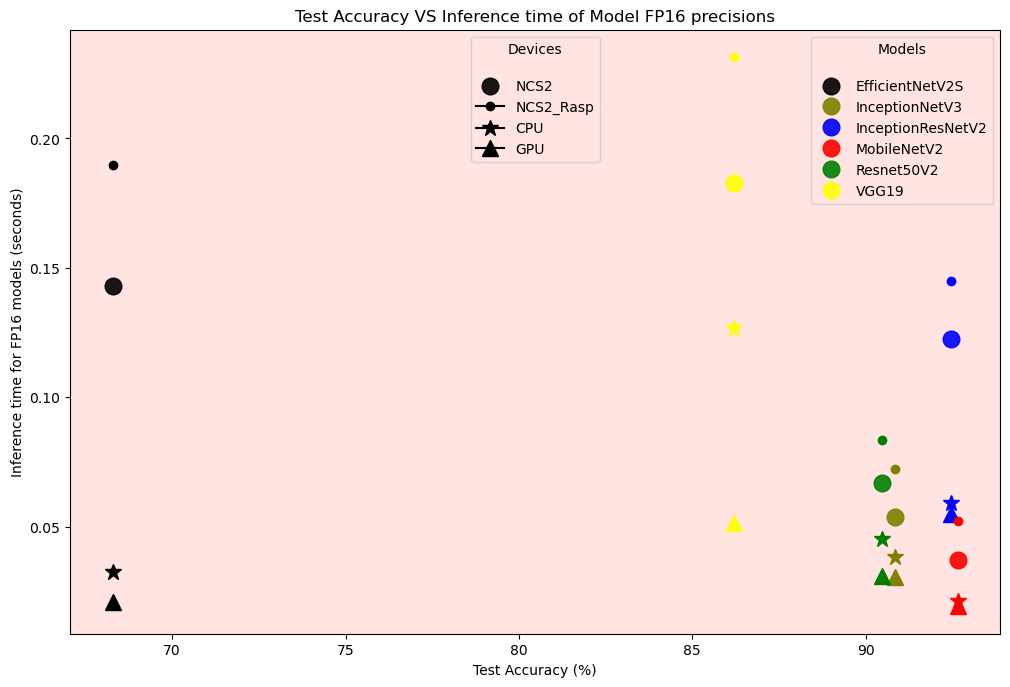

In [12]:
import matplotlib.pyplot as plt

colors = {'MobileNetV2':'red', 'Resnet50V2':'green', 'InceptionResNetV2':'blue', 'VGG19':'yellow', 'InceptionNetV3':'olive', 'EfficientNetV2S':'black'}

groups = df.groupby('model')
for name, group in groups:
    plt.plot(group.accuracy, group.NCS2, marker='o', linestyle='', alpha=0.9, markersize=12, label=name, color=colors[name])
    plt.plot(group.accuracy, group.NCS2_Rasp, marker='.', markersize=12, color=colors[name])
    plt.plot(group.accuracy, group.CPU, marker='*', markersize=12, color=colors[name])
    plt.plot(group.accuracy, group.GPU, marker='^', markersize=12, color=colors[name])

first_leg=plt.legend(title="Models\n")
plt.xlabel('Test Accuracy (%)')
plt.ylabel('Inference time for FP16 models (seconds)')
plt.title('Test Accuracy VS Inference time of Model FP16 precisions')
plt.gca().add_artist(first_leg)
plt.legend(['NCS2','NCS2_Rasp','CPU','GPU'], loc='upper center', title="Devices\n")
plt.show()